In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Decision trees
## Decision trees (recall) 
The classification decision tree receives as inputs:
  + $X$: a set of point or objects, described in a given space (set of features: usually $\in \mathbb{R}$). 
  + $y$: the set of class-memberships of each object $\in X$ (discrete).
    
For instance in the `iris` dataset, each flower was described through the length and the width of its sepal and petal (4D space), and the corresponding classes were simply the flower species (Iris setosa, Iris virginica and Iris versicolor).

Then the goal of the decision tree is to create splits in order to separate the different objects from dataset according to their class membership. 
The path between the root and the leaf of a decision tree denotes a decision rule that allows to assign a data point to a given class.

At each iteration, a new split is chosen in order to maximize an entropy or gini criteria (purity criteria).

## Regression decision trees

The regression decision tree works similarly, however in this case, the goal is no longer to assign each point to a class, but to infer the value of the target variable for the given data point. 
The inputs are in this case:
  + $X$: a set of point or objects, described in a given space (set of features: usually $\in \mathbb{R}$). 
  + $y$: the value of the target variable associated each object $\in X$ (usually $\in \mathbb{R}$).

For instance in the `iris` dataset, each flower could be described through the __sepal length__, the __sepal width__ of the __petal length__ (3D space), and the corresponding target variable could be the __petal width__: The goal is to predict the __petal width__ of a flower from its __petal length__, __sepal length__ and __sepal width__.


At each iteration, a new split is chosen according to the __variance reduction criteria__.

+ Let $S$ be the set of points arriving to node $N$ (before the split).
+ Let $S_t$ be set of points for which the split at node $N$ is __true__
+ Let $S_t$ be set of points for which the split at node $N$ is __false__
+ Let $y_i$ be the target variable of the $i$-th point.
+ Let $y_S$ be the target variables of points $\in S$
+ Let $VAR(y_S)$ be the variance of the values $y_S$

The __variance reduction__ associated to the split at node $N$ is then:


$$I_{V}(N)= VAR(y_{S}) - \left(VAR(y_{S_t}) + VAR(y_{S_f})\right)$$

$$I_{V}(N)=\left(\frac{1}{|S|^{2}} \sum _{i\in S}\sum _{j\in S} \frac {1}{2} (y_{i}-y_{j})^2 \right) - \left(\frac {1}{|S_{t}|^{2}} \sum _{i\in S_{t}} \sum _{j\in S_{t}} \frac {1}{2} (y_{i}-y_{j})^{2} \right) - \left(\frac {1}{|S_{f}|^{2}} \sum _{i\in S_{f}} \sum _{j\in S_{f}} \frac {1}{2} (y_{i}-y_{j})^{2} \right)$$




# Train Regression Decision trees

+ Import the decision tree regression method from sklearn


In [3]:
from sklearn.tree import DecisionTreeRegressor

# Build the training dataset
+ Generate a random input dataset $X$ with $size$ points $X_i \in [low, high]$.

In [4]:
size = 100
low = 0
high = 10
X = np.sort(np.random.uniform(low=low, high=high, size=size))

+ Generate the prediction target (output), by applying a noisy sine function to $X$

In [5]:
min_noise = -0.5
max_noise = 0.5
y = np.sin(X) + np.random.uniform(low=min_noise, high=max_noise, size=size)

+ Plot y=f(X)

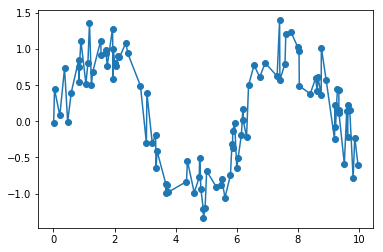

In [6]:
plt.plot(X,y,"o-")

# Apply Regression Decision Trees
+ Fit two decision tree regression models (one with `max_depth = 5` and `max_depth = 2` )

Notice that the main parameters of the Decision tree and the Regression Decision tree are the same

In [7]:
tree_1 = DecisionTreeRegressor(max_depth=2)
tree_2 = DecisionTreeRegressor(max_depth=5)
tree_1 = tree_1.fit(X.reshape(-1, 1), y)
tree_2 = tree_2.fit(X.reshape(-1, 1), y)

+ Apply the predictors on the training dataset

In [8]:
y_1 = tree_1.predict(X.reshape(-1,1))
y_2 = tree_2.predict(X.reshape(-1,1))

+ Plot the predictions of each tree as well as the original dataset

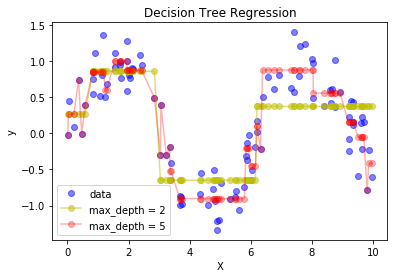

In [9]:
plt.plot(X, y, "bo", label="data",alpha=0.5)
plt.plot(X, y_1, "yo-", label="max_depth = 2",alpha=0.5)
plt.plot(X, y_2, "ro-", label="max_depth = 5", alpha=0.3)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression")
_=plt.legend()

# Analyzing the decision tree structures
It is possible to plot the regression decision tree structure to better understand the underlying model (similarly to classification decision trees). The output attributes correspond to:
+ first line: split condition on the input variables (data point features)
+ second line: mean square error (variance)
+ third line: number of samples (number of data points in the node)
+ fourth line: predicted value for the target variable at the current node

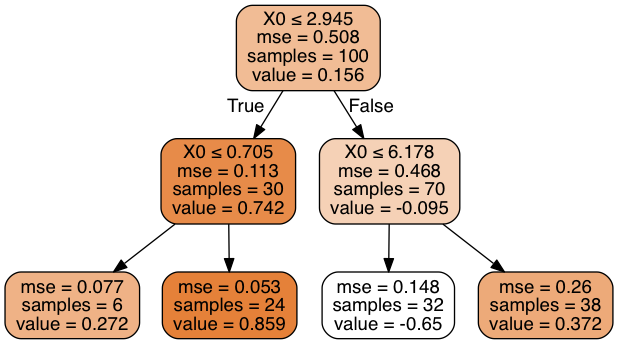

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

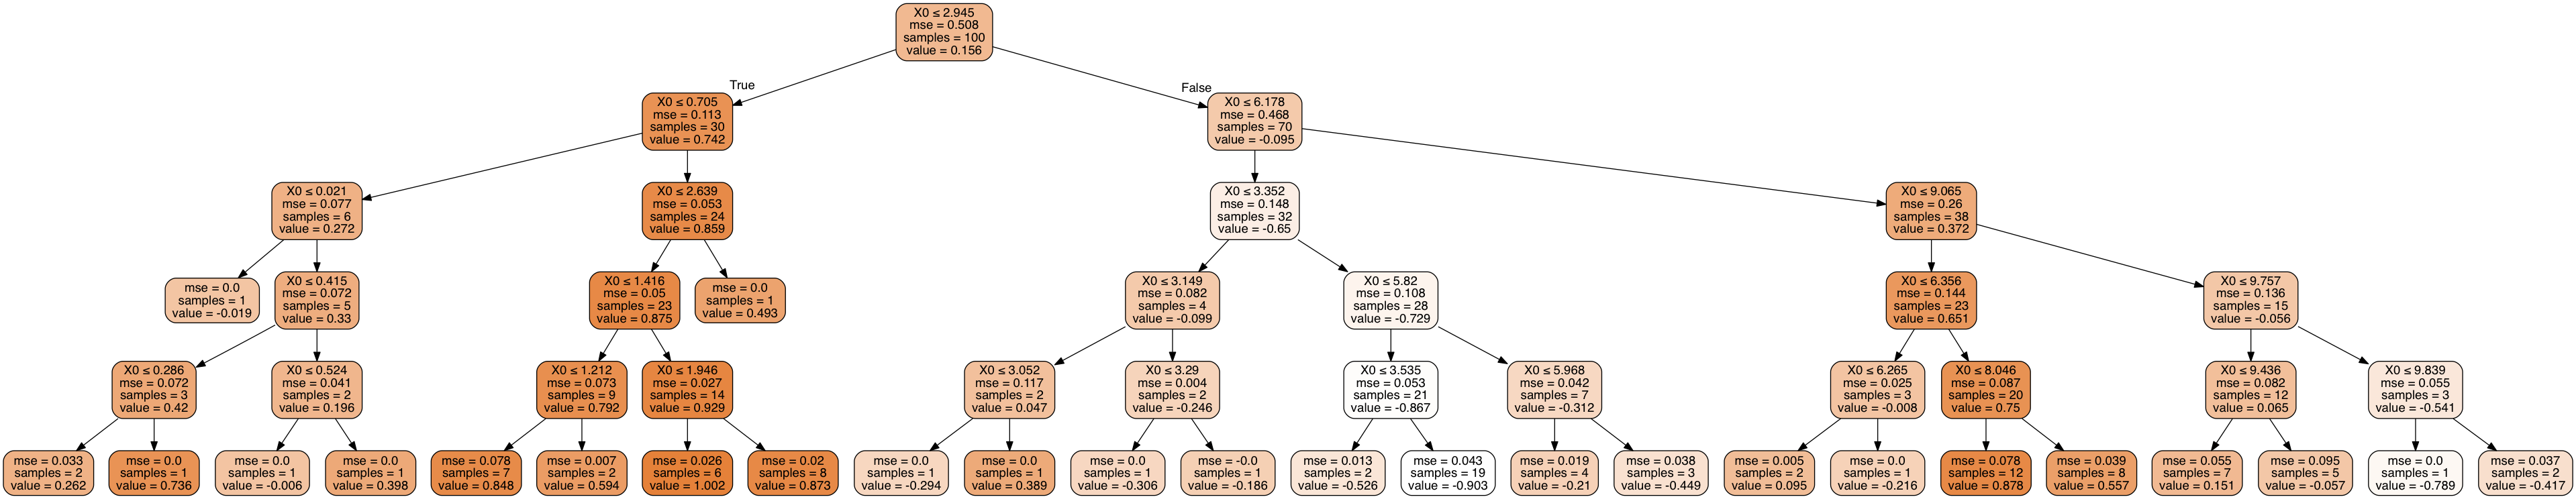

In [11]:
dot_data = StringIO()
export_graphviz(tree_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())